Figure 3A in Mahdavi et al. (2021) Environmental Pollution

This figure compares trace metal concentrations measured by airborne samples and QFF in the studied home.

Plot type: Scatter plot

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
exec(open(r'C:\PhD Research\Generic Codes\notion_corrections.py').read())

In [2]:
### Data pre-processing

df = pd.read_excel(backslash_correct(r'C:\PhD Research\QFF Evaluation\Processed\tm_qff.xlsx'))
df = df.iloc[-12:,:].merge(df.iloc[:12,:], on = 'Element')

df.drop(['measure_x', 'measure_y'], axis = 1, inplace = True)

color_list = ['b',
              'orange',
              'k',
              'r',
              'g',
              'dimgrey',
              'lightcoral',
              'cornflowerblue',
              'grey',
              'springgreen',
              'lightgrey',
              'brown']

x_list = df['Concentration_x'].to_list()
coeff = pd.Series([0.65, 1.5, 1.8, 1.5, 1.5, 1.8, 0.65, 1.6, 1.6, 1.6, 0.65, 0.7 ])
y_list = (df['Concentration_y'] * coeff).to_list()


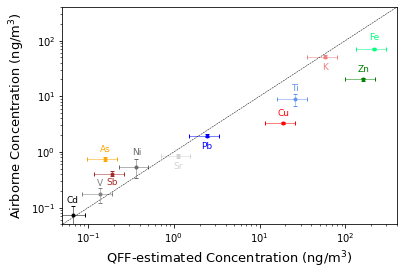

In [3]:
### Figure

plt.figure()

line = pd.Series(np.array([0.051, 399])) 

for i in range(len(df)):
    plt.errorbar(df.iloc[i,:]['Concentration_x'], df.iloc[i,:]['Concentration_y'], 
                 xerr = df.iloc[i,2], yerr = df.iloc[i,4],                 
                 c = color_list[i], marker = 'o', ms = 3,
                ecolor = color_list[i], capsize = 2,   elinewidth = 0.5)

plt.plot(line, line, ls = '--', c = 'k', linewidth = 0.5)

plt.xscale('log')
plt.xticks(np.logspace(-1, 2, 4))
plt.xlim(0.05,400)
plt.xlabel('QFF-estimated Concentration (ng/m$^{3}$)', size = 13)

plt.yscale('log')
plt.ylim(0.05 , 400)
plt.yticks(np.logspace(-1, 2, 4))
plt.ylabel('Airborne Concentration (ng/m$^{3}$)', size = 13)

for i in range(len(df)):
    plt.text(x_list[i], y_list[i], df.iloc[i,0], fontsize = 9, c = color_list[i], ha = 'center', va = 'center')

plt.savefig(r'C:/PhD Research/QFF Evaluation/Processed/plots/Figure_3b.jpg', format='jpg', dpi=1600, bbox_inches='tight')


End of Code